# Titanic Survived Project

#### Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

In [2]:
# Load data from CSV into DataFrame
titanic_data = pd.read_csv('Titanic_Dataset.csv')

In [3]:
# Display first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display last 5 rows of the dataframe
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Display shape of the dataframe
titanic_data.shape

(891, 12)

In [6]:
# Display the names of the columns 
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Checking for the null values 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Display dataframe's details, such as column data types and missing values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Display summary statistics of the dataframe
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data Visualization

In [10]:
sns.set(style = 'whitegrid')

Univariate analysis

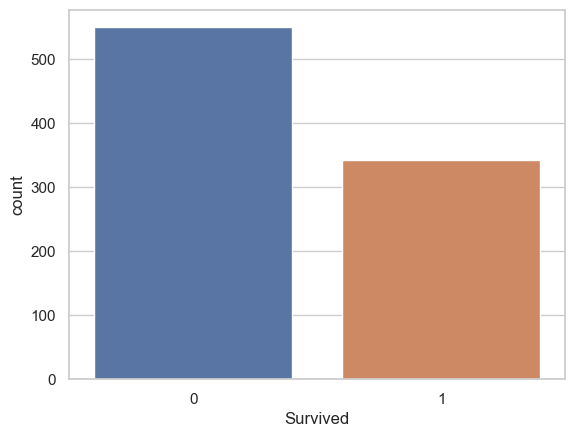

In [11]:
sns.countplot(x = 'Survived', data = titanic_data)
plt.show()

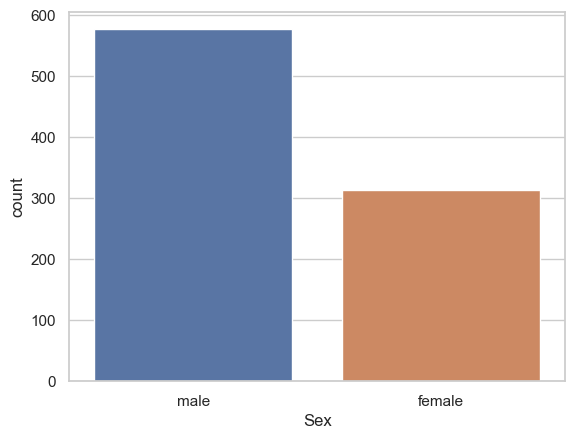

In [12]:
sns.countplot(x = 'Sex', data = titanic_data)
plt.show()

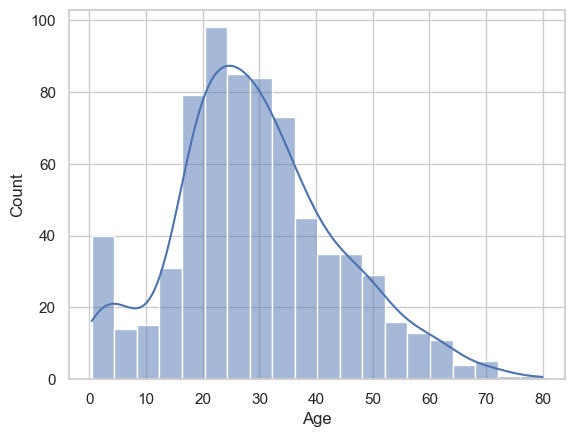

In [13]:
sns.histplot(data = titanic_data, x = 'Age', bins = 20, kde = True)
plt.show()

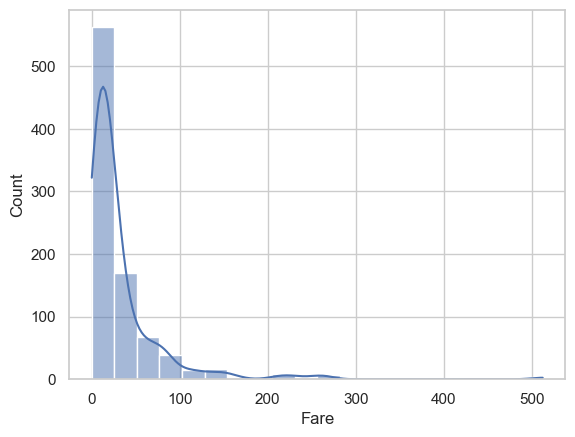

In [14]:
sns.histplot(data = titanic_data, x = 'Fare', bins = 20, kde = True)
plt.show()

 Bivariate Analysis

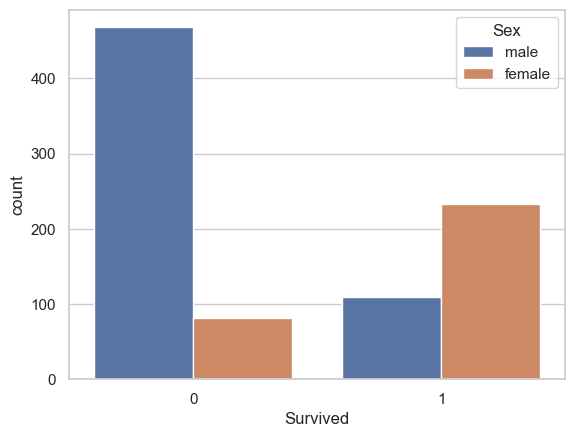

In [15]:
# Count plot of survival based on gender
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

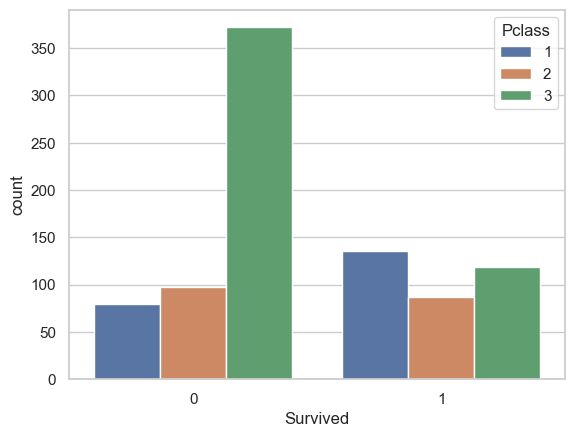

In [16]:
# Bar plot of survival based on passenger class
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data)

#### Data Cleaning

Features such as 'PassengerId,' 'Name,' 'Ticket,' 'Cabin,' and 'Embarked' are typically considered less significant for predicting survival in the context of the Titanic dataset. These features are often not directly related to a passenger's survival outcome and may not provide meaningful information for the prediction task.

In [17]:
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [18]:
# Checking for the null values after dropping above columns
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In 'Age' column, null values are present.

In [19]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace= True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [20]:
# Converting categorical columns into numeric columns
encoder = LabelEncoder()
titanic_data['Sex'] = encoder.fit_transform(titanic_data['Sex'])

In [21]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


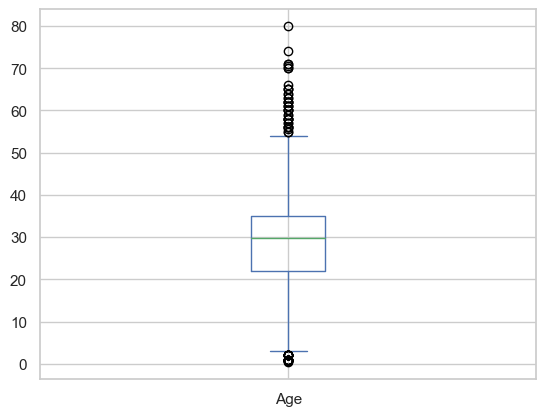

In [22]:
# Cheking for the outliers

# Using boxplot
titanic_data['Age'].plot(kind = 'box')
plt.show()

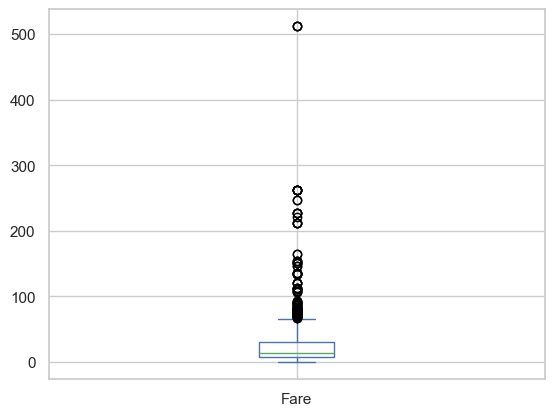

In [23]:
titanic_data['Fare'].plot(kind = 'box')
plt.show()

In [24]:
# Using Z-Score
z_score = abs(zscore(titanic_data))
z_score

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.789272,0.827377,0.737695,0.592481,0.432793,0.473674,0.502445
1,1.266990,1.566107,1.355574,0.638789,0.432793,0.473674,0.786845
2,1.266990,0.827377,1.355574,0.284663,0.474545,0.473674,0.488854
3,1.266990,1.566107,1.355574,0.407926,0.432793,0.473674,0.420730
4,0.789272,0.827377,0.737695,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.207709,0.474545,0.473674,0.386671
887,1.266990,1.566107,1.355574,0.823344,0.474545,0.473674,0.044381
888,0.789272,0.827377,1.355574,0.000000,0.432793,2.008933,0.176263
889,1.266990,1.566107,0.737695,0.284663,0.474545,0.473674,0.044381


Outlier are peresent in the dataset.

In [25]:
# Removing Outliers
z = 3
titanic_data1= titanic_data[(z_score < z).all(axis = 1)]
titanic_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [26]:
titanic_data1.shape

(820, 7)

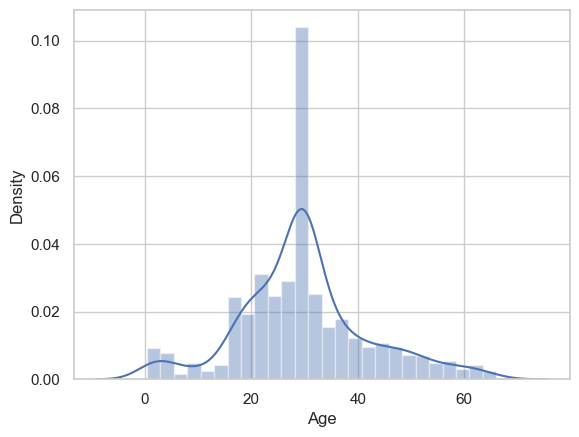

In [27]:
# Checking for the skewness

# Using distplot

sns.distplot(titanic_data1['Age'])
plt.show()

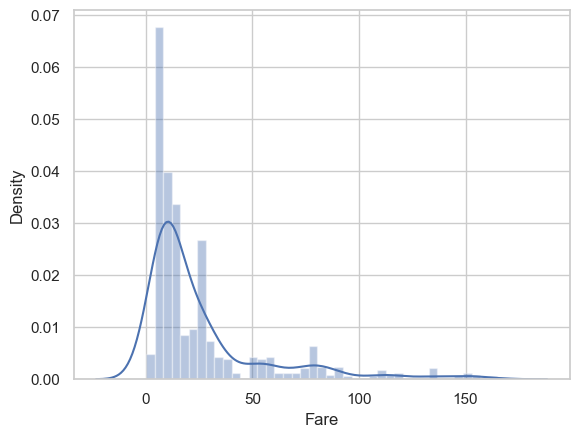

In [28]:
sns.distplot(titanic_data1['Fare'])
plt.show()

In [29]:
titanic_data1.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

SibSp (Positive skewness)

Parch (Positive skewness)

Fare (Positive skewness)

These columns exhibit positive skewness. However, it's important to note that the 'SibSp' and 'Parch' columns, while containing integer values, are more appropriately considered as discrete numerical variables rather than categorical data. On the other hand, the 'Fare' column contains continuous numeric data. Due to its positive skewness, there is a need to reduce the skewness of the 'Fare' column to enhance the distribution's symmetry and improve the performance of model.

In [30]:
# Reducing skewness
transformed_titanic_data1 = titanic_data1.copy()
transformed_titanic_data2 = titanic_data1.copy()
transformed_titanic_data3 = titanic_data1.copy()
transformed_titanic_data4 = titanic_data1.copy()
transformed_titanic_data5 = titanic_data1.copy()
transformed_titanic_data6 = titanic_data1.copy()
transformed_titanic_data7 = titanic_data1.copy()

# Apply different transformations

# Log Transformation
transformed_titanic_data1['Fare'] = np.log1p(titanic_data1['Fare'])

# Square Root Transformation
transformed_titanic_data2['Fare'] = np.sqrt(titanic_data1['Fare'])

# Box-Cox Transformation
transformed_titanic_data3['Fare'], lambda_value = boxcox(titanic_data1['Fare'] + 1)  # Adding 1 to handle zero and negative values

# Reciprocal Transformation
transformed_titanic_data4['Fare'] = 1 / (titanic_data1['Fare'] + 1)  # Adding 1 to handle zero values

# Exponential Transformation
transformed_titanic_data5['Fare'] = np.exp(titanic_data1['Fare'])

# Power Transformation
transformed_titanic_data6['Fare'] = titanic_data1['Fare'] ** 2
transformed_titanic_data7['Fare'] = titanic_data1['Fare'] ** 3

In [31]:
# Checking skewness after after applying transformations
transformed_titanic_data1['Fare'].skew()

0.19636409783591077

In [32]:
transformed_titanic_data2['Fare'].skew()

1.350428111936211

In [33]:
transformed_titanic_data3['Fare'].skew()

-0.01860152470412214

In [34]:
transformed_titanic_data4['Fare'].skew()

6.18585500758757

In [35]:
transformed_titanic_data5['Fare'].skew()

20.21129227137613

In [36]:
transformed_titanic_data6['Fare'].skew()

3.9758650311044335

In [37]:
transformed_titanic_data7['Fare'].skew()

5.329892846869378

Boxcox transformation reduced the skewness to the maximum extent therefore, the columns in transformed_df3 exhibit reduced skewness.

In [38]:
titanic_data2 = transformed_titanic_data3
titanic_data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,1.997271
1,1,1,0,38.0,1,0,3.832738
2,1,3,0,26.0,0,0,2.067503
3,1,1,0,35.0,1,0,3.599646
4,0,3,1,35.0,0,0,2.079894


In [39]:
# Checking the correalation coefficient matrix
correlation_coefficient = titanic_data2.corr()
correlation_coefficient

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.322306,-0.554888,-0.090926,0.094459,0.201071,0.364889
Pclass,-0.322306,1.000000,0.138041,-0.327522,-0.052312,-0.078366,-0.681196
Sex,-0.554888,0.138041,1.000000,0.094544,-0.199204,-0.251872,-0.271353
Age,-0.090926,-0.327522,0.094544,1.000000,-0.148196,-0.259724,0.138016
SibSp,0.094459,-0.052312,-0.199204,-0.148196,1.000000,0.307210,0.344134
Parch,0.201071,-0.078366,-0.251872,-0.259724,0.307210,1.000000,0.311227
Fare,0.364889,-0.681196,-0.271353,0.138016,0.344134,0.311227,1.000000


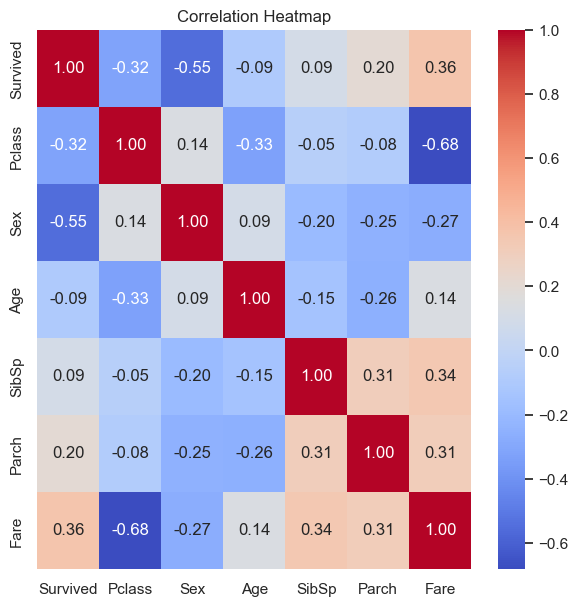

In [40]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (7, 7))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

In [41]:
# Extracting features and target from dataset
features = titanic_data2.drop(columns = ['Survived'])
target = titanic_data2['Survived']

In [42]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_titanic_data = scaler.fit_transform(features)

In [43]:
titanic_data3 = pd.DataFrame(scaled_titanic_data, columns = features.columns[:])
titanic_data3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.833995,0.722036,-0.641702,1.051956,-0.451141,-0.834702
1,-1.586804,-1.384973,0.675821,1.051956,-0.451141,1.553645
2,0.833995,-1.384973,-0.312321,-0.563407,-0.451141,-0.743314
3,-1.586804,-1.384973,0.428785,1.051956,-0.451141,1.250341
4,0.833995,0.722036,0.428785,-0.563407,-0.451141,-0.727191


#### Checking the Variance Inflation Factor

In [44]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = titanic_data3.columns
vif_data["VIF"] = [variance_inflation_factor(titanic_data3.values, i) for i in range(titanic_data3.shape[1])]

# Print the VIF data
print(vif_data)

  Features       VIF
0   Pclass  2.189947
1      Sex  1.130318
2      Age  1.250818
3    SibSp  1.278632
4    Parch  1.300402
5     Fare  2.484379


There is no need to drop any feature as there isn't much multicollinearity between the features.

In [45]:
# Storing features and target in X and y
X = titanic_data3
y = target

#### Finding the best random state

In [46]:
# Finding best random state
max_accuracy = 0
max_random_state = 0
for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    rfc = RandomForestClassifier(random_state = i)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_random_state = i 
print("Best Accuracy score is", max_accuracy, "at random state", max_random_state)

Best Accuracy score is 0.8577235772357723 at random state 118


#### Splitting the dataset into training and testing sets

In [47]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = max_random_state)

#### Different Models for predicting Survival of a passenger

In [48]:
# Using different classification models for predicting survival of a passenger

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_lr))
print("Classifiction report:", classification_report(y_test, y_pred_lr))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lr))

Accuracy score: 0.8048780487804879
Classifiction report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       153
           1       0.76      0.70      0.73        93

    accuracy                           0.80       246
   macro avg       0.80      0.78      0.79       246
weighted avg       0.80      0.80      0.80       246

Confusion matrix: [[133  20]
 [ 28  65]]


In [49]:
# K-Nearest Neighbors
knc_model = KNeighborsClassifier(n_neighbors = 3)
knc_model.fit(X_train, y_train)
y_pred_knc = knc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_knc))
print("Classifiction report:", classification_report(y_test, y_pred_knc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_knc))

Accuracy score: 0.8252032520325203
Classifiction report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       153
           1       0.79      0.73      0.76        93

    accuracy                           0.83       246
   macro avg       0.82      0.81      0.81       246
weighted avg       0.82      0.83      0.82       246

Confusion matrix: [[135  18]
 [ 25  68]]


In [50]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gnb))
print("Classifiction report:", classification_report(y_test, y_pred_gnb))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gnb))

Accuracy score: 0.7276422764227642
Classifiction report:               precision    recall  f1-score   support

           0       0.77      0.81      0.79       153
           1       0.65      0.59      0.62        93

    accuracy                           0.73       246
   macro avg       0.71      0.70      0.70       246
weighted avg       0.72      0.73      0.72       246

Confusion matrix: [[124  29]
 [ 38  55]]


In [51]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_svc))
print("Classifiction report:", classification_report(y_test, y_pred_svc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_svc))

Accuracy score: 0.8455284552845529
Classifiction report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88       153
           1       0.83      0.74      0.78        93

    accuracy                           0.85       246
   macro avg       0.84      0.83      0.83       246
weighted avg       0.84      0.85      0.84       246

Confusion matrix: [[139  14]
 [ 24  69]]


In [52]:
# Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_dtc))
print("Classifiction report:", classification_report(y_test, y_pred_dtc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_dtc))

Accuracy score: 0.7764227642276422
Classifiction report:               precision    recall  f1-score   support

           0       0.83      0.81      0.82       153
           1       0.70      0.72      0.71        93

    accuracy                           0.78       246
   macro avg       0.76      0.77      0.76       246
weighted avg       0.78      0.78      0.78       246

Confusion matrix: [[124  29]
 [ 26  67]]


In [53]:
# Random Forest Classifier 
rfc_model = RandomForestClassifier(random_state = 1)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("Classifiction report:", classification_report(y_test, y_pred_rfc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_rfc))

Accuracy score: 0.8292682926829268
Classifiction report:               precision    recall  f1-score   support

           0       0.85      0.88      0.86       153
           1       0.79      0.75      0.77        93

    accuracy                           0.83       246
   macro avg       0.82      0.81      0.82       246
weighted avg       0.83      0.83      0.83       246

Confusion matrix: [[134  19]
 [ 23  70]]


In [54]:
# Extra Trees Classifier
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
y_pred_etc = etc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_etc))
print("Classifiction report:", classification_report(y_test, y_pred_etc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_etc))

Accuracy score: 0.8333333333333334
Classifiction report:               precision    recall  f1-score   support

           0       0.85      0.88      0.87       153
           1       0.80      0.75      0.77        93

    accuracy                           0.83       246
   macro avg       0.82      0.82      0.82       246
weighted avg       0.83      0.83      0.83       246

Confusion matrix: [[135  18]
 [ 23  70]]


In [55]:
# AdaBoost Classifier
abc_model = AdaBoostClassifier()
abc_model.fit(X_train, y_train)
y_pred_abc = abc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_abc))
print("Classifiction report:", classification_report(y_test, y_pred_abc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_abc))

Accuracy score: 0.8089430894308943
Classifiction report:               precision    recall  f1-score   support

           0       0.84      0.86      0.85       153
           1       0.76      0.72      0.74        93

    accuracy                           0.81       246
   macro avg       0.80      0.79      0.79       246
weighted avg       0.81      0.81      0.81       246

Confusion matrix: [[132  21]
 [ 26  67]]


In [56]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state = 1)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gbc))
print("Classifiction report:", classification_report(y_test, y_pred_gbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gbc))

Accuracy score: 0.8170731707317073
Classifiction report:               precision    recall  f1-score   support

           0       0.82      0.91      0.86       153
           1       0.82      0.67      0.73        93

    accuracy                           0.82       246
   macro avg       0.82      0.79      0.80       246
weighted avg       0.82      0.82      0.81       246

Confusion matrix: [[139  14]
 [ 31  62]]


In [57]:
# XGBoost Classifier
xgbc_model = xgb.XGBClassifier(random_state = 1)
xgbc_model.fit(X_train, y_train)
y_pred_xgbc = xgbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_xgbc))
print("Classifiction report:", classification_report(y_test, y_pred_xgbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_xgbc))

Accuracy score: 0.7967479674796748
Classifiction report:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       153
           1       0.75      0.70      0.72        93

    accuracy                           0.80       246
   macro avg       0.79      0.78      0.78       246
weighted avg       0.79      0.80      0.80       246

Confusion matrix: [[131  22]
 [ 28  65]]


In [58]:
# Bagging Classifier
bc_model = BaggingClassifier()
bc_model.fit(X_train, y_train)
y_pred_bc = bc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_bc))
print("Classifiction report:", classification_report(y_test, y_pred_bc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_bc))

Accuracy score: 0.8252032520325203
Classifiction report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       153
           1       0.79      0.73      0.76        93

    accuracy                           0.83       246
   macro avg       0.82      0.81      0.81       246
weighted avg       0.82      0.83      0.82       246

Confusion matrix: [[135  18]
 [ 25  68]]


#### Cross Validation

In [59]:
# Applying Cross Validation Methods on each model

# For Logistic Regression
cv_score = cross_val_score(lr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_lr) - cv_score.mean())

[0.79878049 0.77439024 0.76829268 0.79878049 0.79878049]
0.7878048780487805
Difference between accuracy score and cross validation score: 0.017073170731707332


In [60]:
# For K-Nearest Neighbors
cv_score = cross_val_score(knc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_knc) - cv_score.mean())

[0.78658537 0.77439024 0.84756098 0.77439024 0.83536585]
0.8036585365853659
Difference between accuracy score and cross validation score: 0.021544715447154417


In [61]:
# For Gaussian Naive Bayes
cv_score = cross_val_score(gnb_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gnb) - cv_score.mean())

[0.67682927 0.77439024 0.7804878  0.79268293 0.81097561]
0.7670731707317073
Difference between accuracy score and cross validation score: -0.03943089430894309


In [62]:
# For Support Vector Classifier
cv_score = cross_val_score(svc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_svc) - cv_score.mean())

[0.82926829 0.81097561 0.80487805 0.81097561 0.84756098]
0.8207317073170731
Difference between accuracy score and cross validation score: 0.02479674796747977


In [63]:
# For Decision Tree Classifier
cv_score = cross_val_score(dtc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_dtc) - cv_score.mean())

[0.70121951 0.78658537 0.80487805 0.7804878  0.80487805]
0.775609756097561
Difference between accuracy score and cross validation score: 0.0008130081300812275


In [64]:
# For Random Forest Classifier
cv_score = cross_val_score(rfc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_rfc) - cv_score.mean())

[0.75       0.81097561 0.84756098 0.77439024 0.83536585]
0.8036585365853659
Difference between accuracy score and cross validation score: 0.025609756097560887


In [65]:
# For Extra Trees Classifier
cv_score = cross_val_score(etc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_etc) - cv_score.mean())

[0.73170732 0.78658537 0.8597561  0.77439024 0.79878049]
0.7902439024390244
Difference between accuracy score and cross validation score: 0.043089430894308944


In [66]:
# For Gradient Boosting Classifier
cv_score = cross_val_score(gbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gbc) - cv_score.mean())

[0.81097561 0.82317073 0.83536585 0.79268293 0.82317073]
0.8170731707317074
Difference between accuracy score and cross validation score: -1.1102230246251565e-16


In [67]:
# For AdaBoost Classifier
cv_score = cross_val_score(abc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_abc) - cv_score.mean())

[0.76829268 0.78658537 0.79878049 0.79268293 0.84756098]
0.7987804878048781
Difference between accuracy score and cross validation score: 0.010162601626016232


In [68]:
# For XGBoost Classifier
cv_score = cross_val_score(xgbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_xgbc) - cv_score.mean())

[0.73780488 0.81707317 0.86585366 0.76829268 0.81097561]
0.7999999999999999
Difference between accuracy score and cross validation score: -0.003252032520325132


In [69]:
# For Bagging Classifier
cv_score = cross_val_score(bc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_bc) - cv_score.mean())

[0.7804878  0.76829268 0.84756098 0.78658537 0.81097561]
0.7987804878048781
Difference between accuracy score and cross validation score: 0.026422764227642226


Gradient Boosting Classifier has given least difference between accuracy score and cross validation score that is -1.1102230246251565e-16

Gradient Boosting Classifier model is the best model

#### Hyper Parameter Tuning

In [70]:
# Hyper parameter tuning

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],  # Number of boosting stages
    'learning_rate': [0.1, 0.2],  # Step size for each iteration
    'max_depth': [3, 4],  # Maximum depth of individual trees
    'min_samples_split': [2, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting individual trees
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
}

In [71]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4], 'n_estimators': [50, 100],
                         'subsample': [0.8, 1.0]})

In [72]:
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50,
 'subsample': 0.8}

In [73]:
# Creating final model
final_model = GradientBoostingClassifier(learning_rate = 0.2 , max_depth = 4, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50, subsample = 0.8)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
accu_score = accuracy_score(y_test, pred_values)
print(accu_score * 100)

82.52032520325203


#### Plotting AUC-ROC Curve

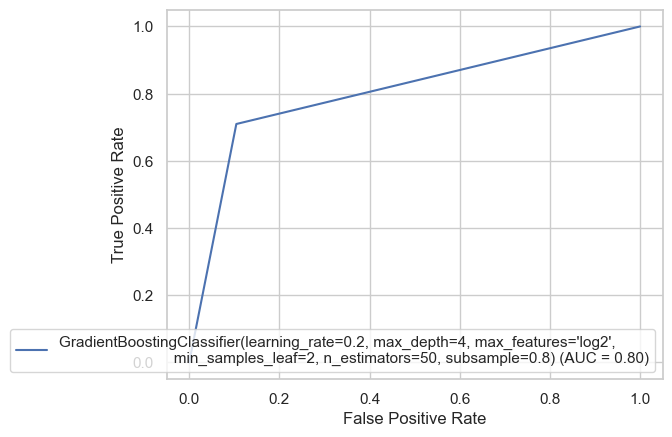

In [74]:
fpr, tpr, thresolds = roc_curve(y_test, pred_values)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()
plt.show()

In [75]:
# Saving the model 
joblib.dump(final_model, "Titanic_Survived_Project.pkl")

['Titanic_Survived_Project.pkl']

In [76]:
# Loading the saved model
model = joblib.load("Titanic_Survived_Project.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [77]:
# Compairing actual and predicted values
actual_values = np.array(y_test)
df = pd.DataFrame()
df['Actual Values'] = actual_values
df['Predicted Values'] = predicted_values
df

,Actual Values,Predicted Values
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
241,0,0
242,1,0
243,0,0
244,0,0


In [78]:
# Testing the model
passenger_details = pd.DataFrame({
    'Pclass': [3],       # Passenger class (1st, 2nd, or 3rd)
    'Age': [25],         # Age of the person
    'SibSp': [1],        # Number of siblings/spouses aboard
    'Parch': [0],        # Number of parents/children aboard
    'Fare': [20.5],      # Fare paid by the person
    'Sex': [0],          # 1 if female, 0 if male     
})

# Use the trained model to predict survival
prediction = final_model.predict(passenger_details)

if prediction[0] == 1:
    print("The model predicts that the person will survive.")
else:
    print("The model predicts that the person will not survive.")

The model predicts that the person will not survive.
